In [8]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [9]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [10]:
# 添加缺失的vwap字段（如果未提供）
if 'vwap' not in df.columns:
    df['vwap'] = df['turnover'] / df['volume']

In [11]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [12]:
# 因子1：波动率调整的上影线因子（KUP1_VR）
def calculate_kup1_vr(df, window=20):
    """
    用波动率调整上影线因子，低波动环境下放大信号
    公式：KUP1_VR = (high - max(open, close)) / (open * atr)
    原理：在低波动市场，上影线信号更可靠
    """
    # 计算ATR（平均真实波幅）
    df['atr'] = ta.atr(df['high'], df['low'], df['close'], length=window)
    
    # 计算基础KUP1
    max_open_close = np.maximum(df['open'], df['close'])
    upper_shadow = df['high'] - max_open_close
    base_kup1 = upper_shadow / df['open']
    
    # 波动率调整
    return base_kup1 / df['atr']

# 因子测试

In [13]:
evaluator.set_factor(
    factor_data_or_func=calculate_kup1_vr,
    factor_name='calculate_kup1_vr'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.015107
   Rank_IC (Spearman): 0.003226
📊 信息比率:
   IR: 0.336885
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130725
   因子列: calculate_kup1_vr
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


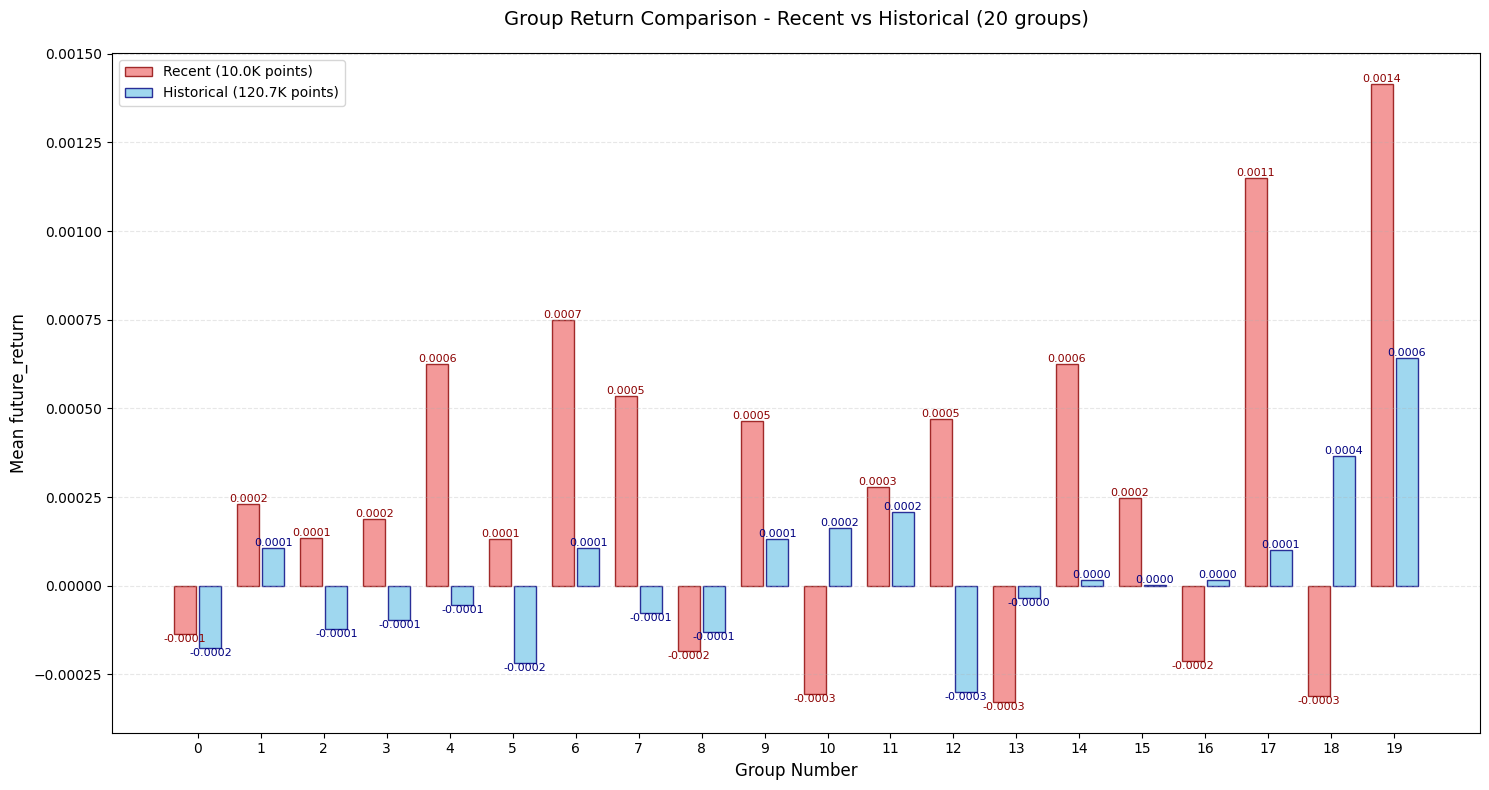

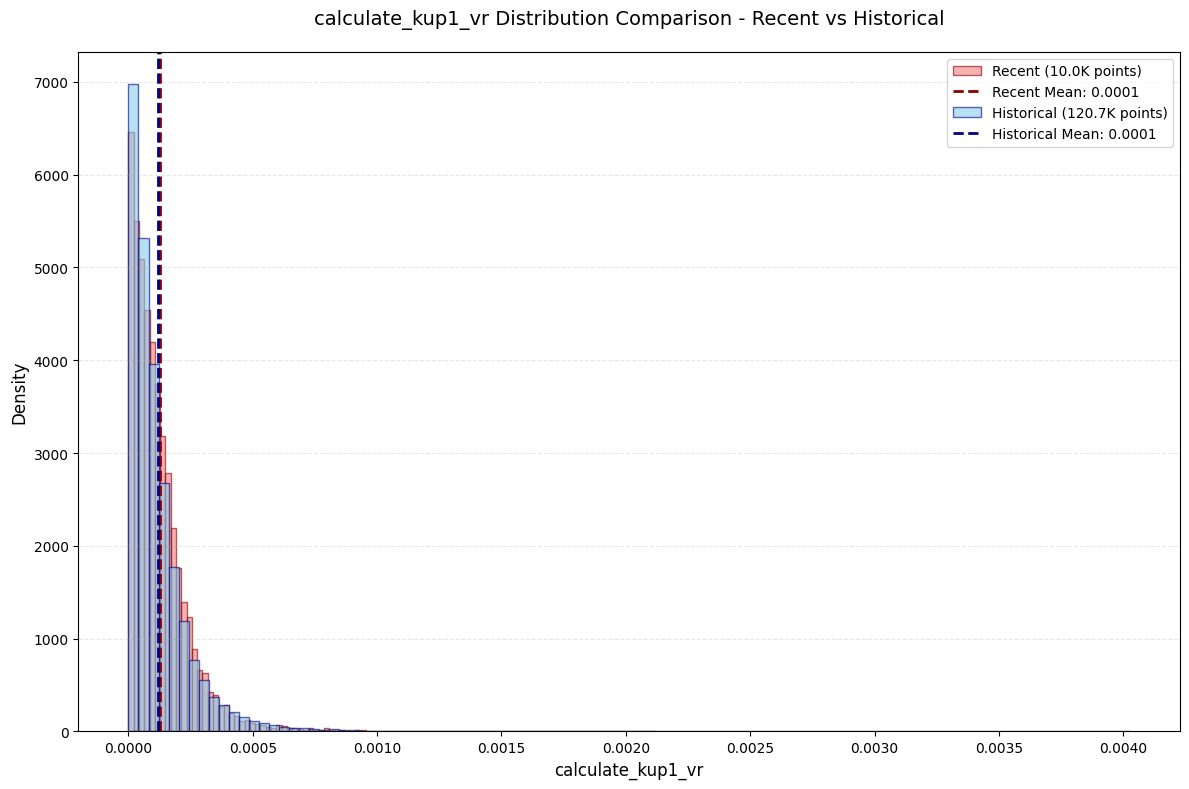

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [14]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)